## Living Costs Food Survey: Data Cleaning

This script contains the following:
#### 01. Import Libraries and Assign Path
#### 02. Importing and Checking UK_BMI.xlsx
#### 03. Wrangling df_BMI
##### Change data types, check for null values and mixed-type data 
##### Check for duplicates and unique values
#### 04. Descriptive Statistics BMI
#### 05. Export the dataframe as BMI.csv
---

## 01. Import Libraries and Assign Path

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Assign the main project folder path to the variable path
path = r'/Users/elsaekevall/Jupyter_Notebook/Career_Foundry/09_2022_LCF_Analysis/'

In [3]:
path

'/Users/elsaekevall/Jupyter_Notebook/Career_Foundry/09_2022_LCF_Analysis/'

## 02. Importing and Checking UK_BMI.xlsx

In [4]:
# Use the os.path.join() function to import the UK_BMI.xlsx file as pandas a dataframe without the index column and view first five rows
df_BMI = pd.read_excel(os.path.join(path, '02_Data', '02_1_Original_Data', 'UK_BMI.xlsx'), index_col = False)
df_BMI.head()

,region,% underweight,% normal,% overweight,% obese,% morbidly obese,% overweight (25+),% obese (30+),year,age_group
0,North East,2.582532,31.197942,32.244135,29.483563,4.491828,66.219526,33.975391,2019,16+
1,North West,0.560719,30.982223,38.279052,26.739931,3.438074,68.457057,30.178005,2019,16+
2,Yorkshire & the Humber,0.747205,35.800674,34.390792,24.562451,4.498878,63.452121,29.061329,2019,16+
3,East Midlands,2.335773,32.922971,33.958128,26.669912,4.113216,64.741257,30.783128,2019,16+
4,West Midlands,2.657712,28.137455,35.628076,29.294755,4.282002,69.204833,33.576757,2019,16+


In [5]:
# check bottom five rows of the dataframe df_BMI
df_BMI.tail()

,region,% underweight,% normal,% overweight,% obese,% morbidly obese,% overweight (25+),% obese (30+),year,age_group
70,Northern Ireland,1.723454,36.573337,36.752133,22.722156,2.228921,61.703209,24.951077,2019,16+
71,Northern Ireland,1.531777,34.355888,37.714028,23.663306,2.735,64.112334,26.398306,2018,16+
72,Northern Ireland,1.530822,36.295681,35.168353,24.205032,2.800112,62.173498,27.005144,2017,16+
73,Northern Ireland,1.434617,37.574693,34.611944,24.032178,2.346568,60.99069,26.378746,2016,16+
74,Northern Ireland,1.730771,37.232317,36.081966,22.229643,2.725303,61.036913,24.954946,2015,16+


In [6]:
# dataframe information
df_BMI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   region              75 non-null     object
 1   % underweight       75 non-null     object
 2   % normal            75 non-null     object
 3   % overweight        75 non-null     object
 4   % obese             75 non-null     object
 5   % morbidly obese    75 non-null     object
 6   % overweight (25+)  75 non-null     object
 7   % obese (30+)       75 non-null     object
 8   year                75 non-null     int64 
 9   age_group           75 non-null     object
dtypes: int64(1), object(9)
memory usage: 6.0+ KB


In [7]:
# Check the dataframe columns
df_BMI.columns

Index(['region', '% underweight', '% normal', '% overweight', '% obese',
       '% morbidly obese', '% overweight (25+)', '% obese (30+)', 'year',
       'age_group'],
      dtype='object')

In [8]:
# Check the dataframe shape
df_BMI.shape

(75, 10)

## 03. Cleaning and Wrangling df_BMI

### Change data types, check for null values and mixed-type data 

In [9]:
# Change the %'s columns to float and the Year to integer
df_BMI = df_BMI.astype({'% underweight': 'float32', '% normal': 'float32', '% overweight': 'float32', '% obese': 'float32', '% morbidly obese': 'float32', '% overweight (25+)': 'float32', '% obese (30+)': 'float32'})
df_BMI['year'] = df_BMI['year'].astype('int32')

In [10]:
# dataframe types
df_BMI.dtypes

region                 object
% underweight         float32
% normal              float32
% overweight          float32
% obese               float32
% morbidly obese      float32
% overweight (25+)    float32
% obese (30+)         float32
year                    int32
age_group              object
dtype: object

In [11]:
# Count the values in each column
df_BMI.count()

region                75
% underweight         59
% normal              59
% overweight          64
% obese               59
% morbidly obese      59
% overweight (25+)    73
% obese (30+)         73
year                  75
age_group             75
dtype: int64

In [12]:
# Count NaN values in the dataframe
df_BMI.isnull().sum()

region                 0
% underweight         16
% normal              16
% overweight          11
% obese               16
% morbidly obese      16
% overweight (25+)     2
% obese (30+)          2
year                   0
age_group              0
dtype: int64

Nulls in % Overweight and % Obese due to missing data for Wales in 2015 and 2016

In [13]:
# Check for mixed-type data
for col in df_BMI.columns.tolist():
  weird = (df_BMI[[col]].applymap(type) != df_BMI[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_BMI[weird]) > 0:
    print (col)

No mixed type columns

### Check for duplicates and unique values

In [14]:
# Check for duplicates in the df_BMI dataframe
df_BMI_dups = df_BMI[df_BMI.duplicated()]
df_BMI_dups

,region,% underweight,% normal,% overweight,% obese,% morbidly obese,% overweight (25+),% obese (30+),year,age_group


There are no duplicates in the df_BMI dataframe

In [15]:
# Count the unique values in each column
df_BMI.nunique()

region                13
% underweight         46
% normal              50
% overweight          54
% obese               50
% morbidly obese      50
% overweight (25+)    62
% obese (30+)         62
year                   5
age_group              2
dtype: int64

Region, Year and Age Group counts as expected

In [16]:
# Check the Region column
df_BMI['region'].value_counts(dropna = False)

England                   10
Scotland                  10
North East                 5
North West                 5
Yorkshire & the Humber     5
East Midlands              5
West Midlands              5
East of England            5
London                     5
South East                 5
South West                 5
Wales                      5
Northern Ireland           5
Name: region, dtype: int64

As expected only Scotland and England have children and adults

In [17]:
# Check the % Underweight column
df_BMI['% underweight'].value_counts(dropna = False)

NaN         16
1.200000     3
1.600000     2
0.671306     2
2.088244     2
1.935756     2
2.328733     2
1.260680     2
1.118472     2
1.700000     2
1.813489     2
0.710429     2
1.956820     2
1.400000     1
1.100000     1
0.800000     1
1.300000     1
2.183322     1
2.066293     1
1.576960     1
1.800000     1
2.000000     1
1.723454     1
1.531777     1
1.530822     1
1.434617     1
2.582531     1
0.560719     1
1.674516     1
0.747205     1
2.335773     1
2.657712     1
1.308611     1
2.857910     1
1.725926     1
1.575210     1
1.768487     1
1.118261     1
2.605074     1
0.884723     1
1.175165     1
2.050302     1
1.348689     1
2.241557     1
1.424282     1
2.118898     1
1.730771     1
Name: % underweight, dtype: int64

In [18]:
# Check the % Normal column
df_BMI['% normal'].value_counts(dropna = False)

NaN          16
28.041981     2
34.579750     2
38.821323     2
35.515903     2
34.503407     2
29.177801     2
34.795963     2
31.858065     2
36.425758     2
71.199997     1
69.400002     1
37.574692     1
36.295681     1
34.355888     1
36.542343     1
36.573338     1
38.400002     1
37.299999     1
38.700001     1
34.906380     1
30.500000     1
31.200001     1
30.000000     1
31.600000     1
34.112770     1
67.699997     1
69.000000     1
72.000000     1
30.700001     1
31.197943     1
30.982224     1
35.056068     1
35.800674     1
32.922970     1
28.137455     1
35.412819     1
37.228649     1
38.382877     1
29.761650     1
33.991184     1
29.909727     1
34.902302     1
30.777685     1
37.869205     1
29.152836     1
33.403309     1
39.561897     1
38.131908     1
33.997829     1
37.232315     1
Name: % normal, dtype: int64

In [19]:
# Check the % Overweight column
df_BMI['% overweight'].value_counts(dropna = False)

NaN          11
32.895573     2
35.221909     2
35.376129     2
34.843193     2
36.603191     2
35.628948     2
38.148540     2
35.644630     2
36.560612     2
13.000000     2
35.207588     1
36.053944     1
14.206895     1
37.700001     1
37.299999     1
37.599998     1
36.400002     1
37.400002     1
14.300000     1
12.900000     1
12.700000     1
15.300000     1
12.800000     1
35.700001     1
38.000000     1
36.900002     1
36.752132     1
37.714027     1
35.168354     1
34.611942     1
12.000000     1
32.244137     1
35.576370     1
38.279053     1
34.390793     1
33.958130     1
35.628075     1
37.547459     1
36.471970     1
36.133995     1
38.606152     1
36.218113     1
14.000000     1
35.072762     1
35.303497     1
35.089622     1
35.456707     1
33.589542     1
38.291931     1
34.280380     1
37.882912     1
36.521912     1
35.548534     1
36.081966     1
Name: % overweight, dtype: int64

In [20]:
# Check the '% Obese' column
df_BMI['% obese'].value_counts(dropna = False)

NaN          16
29.125923     2
24.147558     2
22.125231     2
25.921568     2
25.473261     2
28.515766     2
24.348927     2
25.749516     2
24.211533     2
5.700000      1
7.100000      1
24.032179     1
24.205032     1
23.663305     1
26.183777     1
22.722157     1
20.500000     1
20.600000     1
21.900000     1
26.856356     1
26.200001     1
26.000000     1
27.900000     1
26.700001     1
28.733898     1
6.700000      1
6.400000      1
5.900000      1
27.400000     1
29.483562     1
26.739931     1
27.720881     1
24.562450     1
26.669912     1
29.294754     1
22.697529     1
21.314987     1
20.733669     1
26.602253     1
28.022217     1
29.228308     1
24.079330     1
29.721600     1
23.190125     1
29.545942     1
24.607946     1
20.706484     1
20.633017     1
24.449558     1
22.229643     1
Name: % obese, dtype: int64

In [21]:
# Check the % Morbidly obese column
df_BMI['% morbidly obese'].value_counts(dropna = False)

NaN         16
4.272084     2
4.635883     2
2.122008     2
3.853464     2
3.723078     2
3.447460     2
3.274724     2
3.503074     2
3.022329     2
9.400000     1
7.100000     1
2.346568     1
2.800112     1
2.735000     1
2.889428     1
2.228921     1
2.200000     1
2.300000     1
2.100000     1
2.901735     1
4.400000     1
3.800000     1
3.400000     1
4.000000     1
3.553999     1
9.700000     1
9.900000     1
8.300000     1
3.300000     1
4.491828     1
3.438074     1
3.158000     1
4.498878     1
4.113216     1
4.282002     1
3.033584     1
2.126483     1
3.023532     1
3.454734     1
3.314329     1
4.670946     1
3.109795     1
3.526368     1
2.308801     1
5.661376     1
2.348123     1
3.209679     1
1.927879     1
2.911804     1
2.725303     1
Name: % morbidly obese, dtype: int64

In [22]:
# Check the % Overweight (25+) column
df_BMI['% overweight (25+)'].value_counts(dropna = False)

64.159569    2
62.670609    2
65.813202    2
63.268280    2
28.226059    2
            ..
28.000000    1
68.457054    1
64.280792    1
68.656929    1
61.036911    1
Name: % overweight (25+), Length: 63, dtype: int64

In [23]:
# Check the % Obese (30+) column
df_BMI['% obese (30+)'].value_counts(dropna = False)

24.247238    2
29.196339    2
29.252590    2
27.623650    2
31.963226    2
            ..
30.178005    1
17.000000    1
29.073204    1
34.099758    1
24.954947    1
Name: % obese (30+), Length: 63, dtype: int64

In [24]:
# Check the Year column
df_BMI['year'].value_counts(dropna = False)

2019    15
2018    15
2017    15
2016    15
2015    15
Name: year, dtype: int64

In [25]:
# Check the Age_Group column
df_BMI['age_group'].value_counts(dropna = False)

16+      65
2to15    10
Name: age_group, dtype: int64

## 04. Descriptive Statistics

In [26]:
# Describe the dataframe
df_BMI.describe()

,% underweight,% normal,% overweight,% obese,% morbidly obese,% overweight (25+),% obese (30+),year
count,59.000000,59.000000,64.000000,59.000000,59.000000,73.000000,73.000000,75.000000
mean,1.608600,37.107029,32.448978,23.675753,3.803368,59.562466,26.644894,2017.000000
std,0.549565,10.531501,8.368851,5.908204,1.772437,12.742699,5.507711,1.423737
min,0.560719,28.041981,12.000000,5.700000,1.927879,26.900000,14.019164,2015.000000
25%,1.200000,31.400002,34.363190,22.463585,2.895581,59.913441,24.000000,2016.000000
50%,1.600000,34.795963,35.602222,24.562450,3.438074,63.452122,27.623650,2017.000000
75%,1.978410,37.266159,36.603191,26.798143,4.192650,67.000000,30.502756,2018.000000
max,2.857910,72.000000,38.606152,29.721600,9.900000,70.111771,35.207317,2019.000000


In [27]:
# Describe the dataframe grouped by age_group
df_BMI_age = df_BMI.groupby('age_group').describe()
pd.set_option('display.max_columns', 100)
df_BMI_age.T

age_group                    16+        2to15
% underweight count    54.000000     5.000000
              mean      1.639027     1.280000
              std       0.555918     0.370135
              min       0.560719     0.800000
              25%       1.260680     1.100000
...                          ...          ...
year          min    2015.000000  2015.000000
              25%    2016.000000  2016.000000
              50%    2017.000000  2017.000000
              75%    2018.000000  2018.000000
              max    2019.000000  2019.000000

[64 rows x 2 columns]

<AxesSubplot:ylabel='Frequency'>

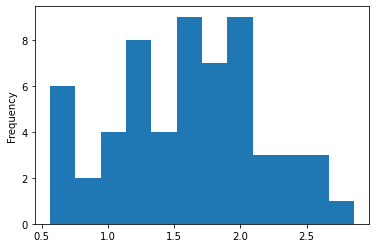

In [28]:
# Create histogram of the % Underweight column
df_BMI['% underweight'].plot.hist(bins = 12)

<AxesSubplot:xlabel='% underweight', ylabel='% underweight'>

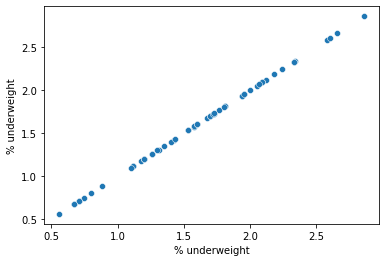

In [29]:
# Create a scatterplot of the % Underweight column against itself to reveal if there are outliers
sns.scatterplot(x = '% underweight', y = '% underweight',data = df_BMI)

<AxesSubplot:ylabel='Frequency'>

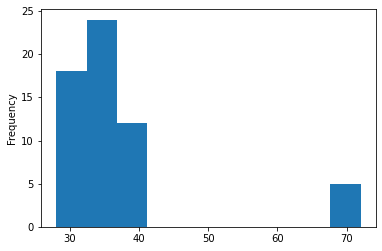

In [30]:
# Create histogram of the % Normal column
df_BMI['% normal'].plot.hist(bins = 10)

<AxesSubplot:xlabel='% normal', ylabel='% normal'>

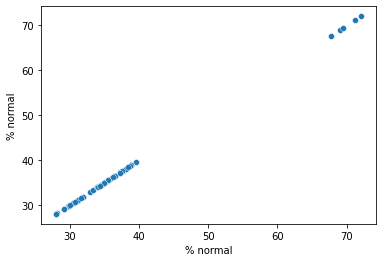

In [31]:
# Create a scatterplot of the % Normal column against itself to reveal if there are outliers
sns.scatterplot(x = '% normal', y = '% normal',data = df_BMI)

The higher values are due to the children's data having a different distribution to the adult data 

<AxesSubplot:ylabel='Frequency'>

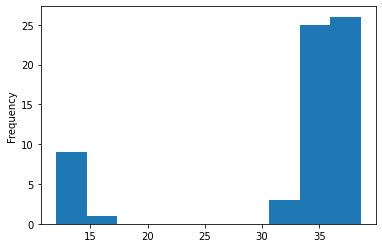

In [32]:
# Create histogram of the % Overweight column
df_BMI['% overweight'].plot.hist(bins = 10)

<AxesSubplot:xlabel='% overweight', ylabel='% overweight'>

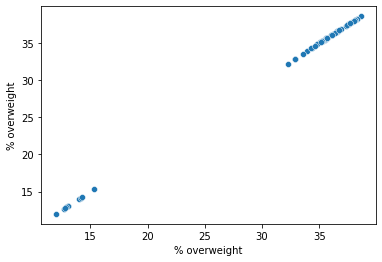

In [33]:
# Create a scatterplot of the % Overweight column against itself to reveal if there are outliers
sns.scatterplot(x = '% overweight', y = '% overweight',data = df_BMI)

The lower values are due to the children's data having a different distribution to the adult data 

<AxesSubplot:ylabel='Frequency'>

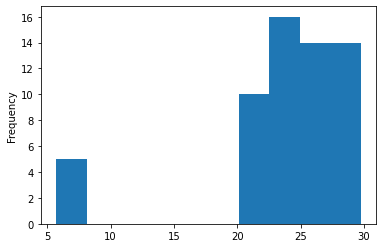

In [34]:
# Create histogram of the % Obese column
df_BMI['% obese'].plot.hist(bins = 10)

<AxesSubplot:xlabel='% obese', ylabel='% obese'>

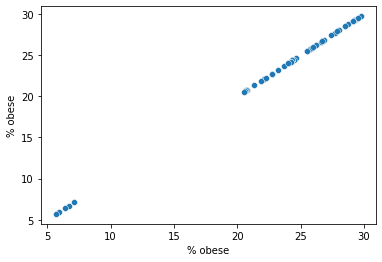

In [35]:
# Create a scatterplot of the % Obese column against itself to reveal if there are outliers
sns.scatterplot(x = '% obese', y = '% obese',data = df_BMI)

The lower values are  due to the children's data having a different distribution to the adult data and will be left

<AxesSubplot:ylabel='Frequency'>

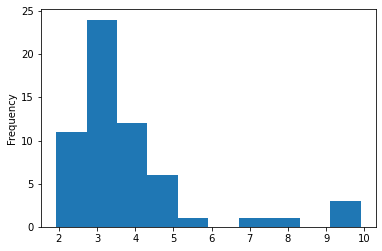

In [36]:
# Create histogram of the % Morbidly obese  column
df_BMI['% morbidly obese'].plot.hist(bins = 10)

<AxesSubplot:xlabel='% morbidly obese', ylabel='% morbidly obese'>

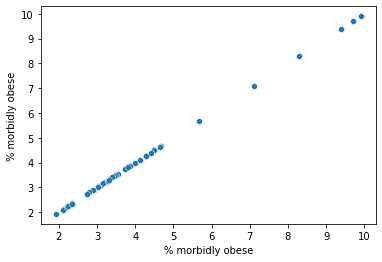

In [37]:
# Create a scatterplot of the % Morbidly obese column against itself to reveal if there are outliers
sns.scatterplot(x = '% morbidly obese', y = '% morbidly obese',data = df_BMI)

The difference in values  is due to the children's data having a different distribution to the adult data

<AxesSubplot:ylabel='Frequency'>

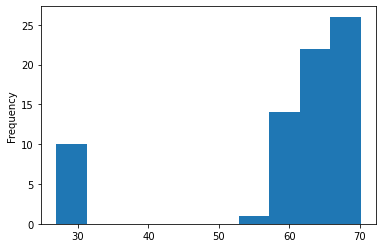

In [38]:
# Create histogram of the % Overweight (25+) column
df_BMI['% overweight (25+)'].plot.hist(bins = 10)

<AxesSubplot:xlabel='% overweight (25+)', ylabel='% overweight (25+)'>

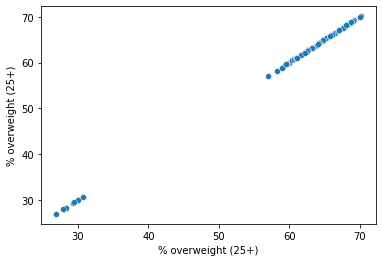

In [39]:
# Create a scatterplot of the % Overweight (25+) column against itself to reveal if there are outliers
sns.scatterplot(x = '% overweight (25+)', y = '% overweight (25+)',data = df_BMI)

The lower values are due to the children's data having a different distribution to the adult data 

<AxesSubplot:ylabel='Frequency'>

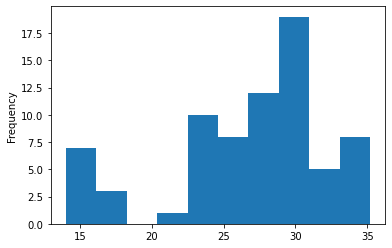

In [40]:
# Create histogram of the % Obese (30+) column
df_BMI['% obese (30+)'].plot.hist(bins = 10)

<AxesSubplot:xlabel='% obese (30+)', ylabel='% obese (30+)'>

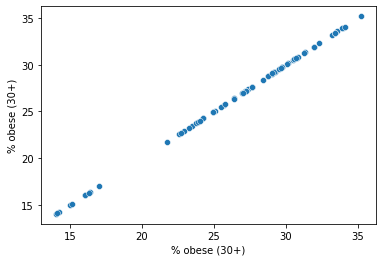

In [41]:
# Create a scatterplot of the % Obese (30+) column against itself to reveal if there are outliers
sns.scatterplot(x = '% obese (30+)', y = '% obese (30+)',data = df_BMI)

The lower values are due to the children's data having a different distribution to the adult data

## 05. Matching the regions with the lcf_analysis data

**lcf_analysis regions**
* 'Eastern', 
* 'North West and Merseyside', 
* 'South East', 
* 'South West',
* 'Wales', 
* 'London', 
* 'West Midlands', 
* 'Yorkshire and the Humber',
* 'North East', 
* 'Northern Ireland', 
* 'East Midlands', 
* 'Scotland'

In [42]:
# View df_BMI['region']
df_BMI['region'].unique()

array(['North East', 'North West', 'Yorkshire & the Humber',
       'East Midlands', 'West Midlands', 'East of England', 'London',
       'South East', 'South West ', 'England', 'Scotland', 'Wales',
       'Northern Ireland'], dtype=object)

In [43]:
# changing region column entries using .replace() and recheck column
df_BMI['region'].replace({'East of England' : 'Eastern', 'North West' : 'North West and Merseyside', 'South West ' : 'South West', 'Yorkshire & the Humber' : 'Yorkshire and the Humber'}, inplace = True)
df_BMI['region'].unique()

array(['North East', 'North West and Merseyside',
       'Yorkshire and the Humber', 'East Midlands', 'West Midlands',
       'Eastern', 'London', 'South East', 'South West', 'England',
       'Scotland', 'Wales', 'Northern Ireland'], dtype=object)

## 06. Export the dataframe as BMI.csv

In [44]:
# Export the dataframe into the Prepared_Data folder as BMI.csv
df_BMI.to_csv(os.path.join(path, '02_Data','02_2_Prepared_Data', 'BMI.csv'))